# <center> eXtreme Gradient Boosting (Featureset 2)
## Hyperparameter tuning is performed on reduced feature set 2

## <font color = 'blue'> Get the data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation, metrics
from sklearn.model_selection import StratifiedKFold
from time import time
import pandas as pd
import collections

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_new              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_new             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_new                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_new               -> array([[-0.74031227,  0.23616372, -0.18182195, ...
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...

In [3]:
print("Training data: ", X_32train_new.shape, "and labels: ", y_32_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_32test_new), X_32test_new[18].shape, "arrays for SNR values:")
print(sorted(X_32test_new.keys()))

Training data:  (80000, 24) and labels:  (80000,)
 
Test data:
Total 20 (4000, 24) arrays for SNR values:
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## <font color = 'blue'> Train and test

In [4]:
#Unfold all test data into one array

from sklearn.utils import shuffle

X_test1 = []
y_test1 = []
for snr in snrs:
    X_test1.append(X_32test_new[snr])
    y_test1.append(y_32_test[snr])

X_test1 = np.vstack(X_test1)
y_test1 = np.hstack(y_test1)
X_test1, y_test1 = shuffle(X_test1, y_test1)
print("Test set {} and labels {}".format(X_test1.shape, y_test1.shape))

Test set (80000, 24) and labels (80000,)


### Tune max_depth and min_child_weight

In [5]:
param_grid1 = {'max_depth':list(range(3,10,2)), 'min_child_weight': list(range(1,6,2))}

start = time()

grid_search1 = GridSearchCV(estimator = XGBClassifier(max_depth=3, eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid1, scoring='accuracy',n_jobs=4)

grid_search1.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 49.34687537749608 minutes


In [6]:
grid_search1.grid_scores_, grid_search1.best_params_, grid_search1.best_score_

([mean: 0.50572, std: 0.00285, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.50545, std: 0.00273, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.50605, std: 0.00170, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.51582, std: 0.00154, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.51576, std: 0.00094, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.51560, std: 0.00149, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.51835, std: 0.00092, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.51841, std: 0.00032, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.51776, std: 0.00010, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.51839, std: 0.00054, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.51899, std: 0.00102, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.51985, std: 0.00013, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 5

### Narrow down parameter values

In [8]:
param_grid2 = {'max_depth':[8,9,10,11], 'min_child_weight': [4,5,6,7]}

start = time()

grid_search2 = GridSearchCV(estimator = XGBClassifier(eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid2, scoring='accuracy',n_jobs=4)

grid_search2.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 67.50378731489181 minutes


In [9]:
grid_search2.grid_scores_, grid_search2.best_params_, grid_search2.best_score_

([mean: 0.51784, std: 0.00047, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.51879, std: 0.00138, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.51991, std: 0.00043, params: {'max_depth': 8, 'min_child_weight': 6},
  mean: 0.51940, std: 0.00113, params: {'max_depth': 8, 'min_child_weight': 7},
  mean: 0.51824, std: 0.00102, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: 0.51985, std: 0.00013, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.51875, std: 0.00111, params: {'max_depth': 9, 'min_child_weight': 6},
  mean: 0.52041, std: 0.00105, params: {'max_depth': 9, 'min_child_weight': 7},
  mean: 0.51909, std: 0.00072, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: 0.51887, std: 0.00127, params: {'max_depth': 10, 'min_child_weight': 5},
  mean: 0.52041, std: 0.00148, params: {'max_depth': 10, 'min_child_weight': 6},
  mean: 0.51995, std: 0.00100, params: {'max_depth': 10, 'min_child_weight': 7},
  mean: 0.51850, std: 0.00184, param

### Narrow down more

In [11]:
param_grid2_1 = {'max_depth':[11, 13, 15]}

start = time()

grid_search2_1 = GridSearchCV(estimator = XGBClassifier(eta=0.3, objective='multi:softprob', min_child_weight=6,
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid2_1, scoring='accuracy',n_jobs=4)

grid_search2_1.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 25.139945753415425 minutes


In [12]:
grid_search2_1.grid_scores_, grid_search2_1.best_params_, grid_search2_1.best_score_

([mean: 0.52107, std: 0.00064, params: {'max_depth': 11},
  mean: 0.51999, std: 0.00056, params: {'max_depth': 13},
  mean: 0.51691, std: 0.00109, params: {'max_depth': 15}],
 {'max_depth': 11},
 0.521075)

### Tune gamma, while setting max_depth and min_child_weight to optimum values

In [13]:
param_grid3 = {'gamma':[i/10.0 for i in range(0,5)]}

start = time()

grid_search3 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid3, scoring='accuracy',n_jobs=4)

grid_search3.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 28.614404435952505 minutes


In [14]:
grid_search3.grid_scores_, grid_search3.best_params_, grid_search3.best_score_

([mean: 0.52107, std: 0.00064, params: {'gamma': 0.0},
  mean: 0.51948, std: 0.00052, params: {'gamma': 0.1},
  mean: 0.51905, std: 0.00089, params: {'gamma': 0.2},
  mean: 0.51992, std: 0.00132, params: {'gamma': 0.3},
  mean: 0.51948, std: 0.00077, params: {'gamma': 0.4}],
 {'gamma': 0.0},
 0.521075)

### Tune subsample and colsample_bytree; set max_depth, min_child_weight and gamma to optimum values

In [15]:
param_grid4 = {'subsample':[i/10.0 for i in range(6,10)], 'colsample_bytree':[i/10.0 for i in range(6,10)]}

start = time()

grid_search4 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid4, scoring='accuracy',n_jobs=4)

grid_search4.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 53.42190520763397 minutes


In [16]:
grid_search4.grid_scores_, grid_search4.best_params_, grid_search4.best_score_

([mean: 0.51818, std: 0.00260, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.51944, std: 0.00130, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.51836, std: 0.00114, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.51894, std: 0.00150, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.51829, std: 0.00172, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.51854, std: 0.00177, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.51919, std: 0.00271, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.51876, std: 0.00066, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.51871, std: 0.00169, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.51926, std: 0.00067, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.51995, std: 0.00016, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.51910, std: 0.00034, params: {'colsample_bytree': 0.8, 'subsample'

### Narrow down search space for subsample and colsample_bytree

In [19]:
param_grid5 = {'subsample': [i/100.0 for i in range(75,100,5)],
               'colsample_bytree':  [i/100.0 for i in range(75,100,5)]}

start = time()

grid_search5 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0,
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid5, scoring='accuracy',n_jobs=4)

grid_search5.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 86.37014453808466 minutes


In [20]:
grid_search5.grid_scores_, grid_search5.best_params_, grid_search5.best_score_

([mean: 0.51825, std: 0.00120, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: 0.51982, std: 0.00127, params: {'colsample_bytree': 0.75, 'subsample': 0.8},
  mean: 0.51916, std: 0.00062, params: {'colsample_bytree': 0.75, 'subsample': 0.85},
  mean: 0.51925, std: 0.00160, params: {'colsample_bytree': 0.75, 'subsample': 0.9},
  mean: 0.51953, std: 0.00091, params: {'colsample_bytree': 0.75, 'subsample': 0.95},
  mean: 0.51843, std: 0.00261, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.51995, std: 0.00016, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.51992, std: 0.00074, params: {'colsample_bytree': 0.8, 'subsample': 0.85},
  mean: 0.51910, std: 0.00034, params: {'colsample_bytree': 0.8, 'subsample': 0.9},
  mean: 0.51892, std: 0.00105, params: {'colsample_bytree': 0.8, 'subsample': 0.95},
  mean: 0.52086, std: 0.00207, params: {'colsample_bytree': 0.85, 'subsample': 0.75},
  mean: 0.51971, std: 0.00191, params: {'colsample_bytree': 0.8

### Fit the model to data and evaluate learning curves- inspect overfitting

In [21]:
#Model with optimum values of hyperprameters 
model = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0, subsample= 0.75, colsample_bytree= 0.85,
                    eta=0.3, objective='multi:softprob', 
                    num_class=8, early_stopping_rounds=20)

eval_set = [(X_32train_new, y_32_train), (X_test1, y_test1)]

#We evaluate the model's performance on training and test sets by three evaluation metrics
# https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
model.fit(X_32train_new, y_32_train, eval_set = eval_set, eval_metric=["merror", "mlogloss"])

[0]	validation_0-merror:0.462388	validation_0-mlogloss:1.92755	validation_1-merror:0.502	validation_1-mlogloss:1.93455
[1]	validation_0-merror:0.437212	validation_0-mlogloss:1.81628	validation_1-merror:0.49475	validation_1-mlogloss:1.83036
[2]	validation_0-merror:0.42695	validation_0-mlogloss:1.73125	validation_1-merror:0.492038	validation_1-mlogloss:1.75192
[3]	validation_0-merror:0.416537	validation_0-mlogloss:1.65796	validation_1-merror:0.49	validation_1-mlogloss:1.68513
[4]	validation_0-merror:0.4087	validation_0-mlogloss:1.59742	validation_1-merror:0.488463	validation_1-mlogloss:1.6311
[5]	validation_0-merror:0.401038	validation_0-mlogloss:1.54234	validation_1-merror:0.488512	validation_1-mlogloss:1.58221
[6]	validation_0-merror:0.394675	validation_0-mlogloss:1.49356	validation_1-merror:0.487775	validation_1-mlogloss:1.53902
[7]	validation_0-merror:0.390763	validation_0-mlogloss:1.45166	validation_1-merror:0.486688	validation_1-mlogloss:1.5023
[8]	validation_0-merror:0.387087	vali

[67]	validation_0-merror:0.225725	validation_0-mlogloss:0.896033	validation_1-merror:0.476537	validation_1-mlogloss:1.14871
[68]	validation_0-merror:0.223275	validation_0-mlogloss:0.893301	validation_1-merror:0.476763	validation_1-mlogloss:1.14855
[69]	validation_0-merror:0.219763	validation_0-mlogloss:0.890074	validation_1-merror:0.476938	validation_1-mlogloss:1.14826
[70]	validation_0-merror:0.217287	validation_0-mlogloss:0.886514	validation_1-merror:0.476662	validation_1-mlogloss:1.14816
[71]	validation_0-merror:0.215163	validation_0-mlogloss:0.88333	validation_1-merror:0.476175	validation_1-mlogloss:1.148
[72]	validation_0-merror:0.213388	validation_0-mlogloss:0.880487	validation_1-merror:0.476413	validation_1-mlogloss:1.14796
[73]	validation_0-merror:0.21075	validation_0-mlogloss:0.877143	validation_1-merror:0.476413	validation_1-mlogloss:1.14763
[74]	validation_0-merror:0.20895	validation_0-mlogloss:0.87447	validation_1-merror:0.476162	validation_1-mlogloss:1.14762
[75]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, early_stopping_rounds=20, eta=0.3, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=11,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.75)

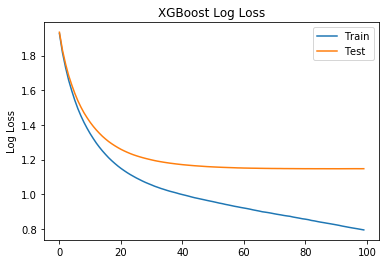

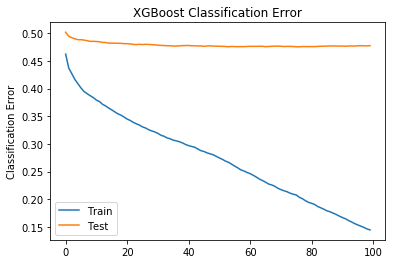

In [22]:
%matplotlib inline

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

### Tune reg_alpha

In [27]:
param_grid6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

start = time()

grid_search6 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0,
                                                      subsample = 0.75, colsample_bytre6 = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid6, scoring='accuracy',n_jobs=4)

grid_search6.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 26.53257782459259 minutes


In [28]:
grid_search6.grid_scores_, grid_search6.best_params_, grid_search6.best_score_

([mean: 0.52055, std: 0.00231, params: {'reg_alpha': 1e-05},
  mean: 0.51877, std: 0.00075, params: {'reg_alpha': 0.01},
  mean: 0.51880, std: 0.00193, params: {'reg_alpha': 0.1},
  mean: 0.51902, std: 0.00176, params: {'reg_alpha': 1},
  mean: 0.50413, std: 0.00110, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.52055)

### Narrow down search space for reg_alpha

In [29]:
param_grid7 = {'reg_alpha':[1e-7, 1e-6, 1e-5, 1e-4]}

start = time()

grid_search7 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0,
                                                      subsample = 0.75, colsample_bytre6 = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid7, scoring='accuracy',n_jobs=4)

grid_search7.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 24.42363880077998 minutes


In [30]:
grid_search7.grid_scores_, grid_search7.best_params_, grid_search7.best_score_

([mean: 0.51972, std: 0.00117, params: {'reg_alpha': 1e-07},
  mean: 0.51972, std: 0.00117, params: {'reg_alpha': 1e-06},
  mean: 0.52055, std: 0.00231, params: {'reg_alpha': 1e-05},
  mean: 0.51865, std: 0.00147, params: {'reg_alpha': 0.0001}],
 {'reg_alpha': 1e-05},
 0.52055)

### Tune reg_lambda

In [32]:
param_grid8 = {'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]}

start = time()

grid_search8 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0, reg_alpha= 1e-05,
                                                      subsample = 0.75, colsample_bytre6 = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid8, scoring='accuracy',n_jobs=4)

grid_search8.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 30.158052655061088 minutes


In [33]:
grid_search8.grid_scores_, grid_search8.best_params_, grid_search8.best_score_

([mean: 0.51899, std: 0.00127, params: {'reg_lambda': 1e-05},
  mean: 0.51923, std: 0.00026, params: {'reg_lambda': 0.01},
  mean: 0.51948, std: 0.00036, params: {'reg_lambda': 0.1},
  mean: 0.52055, std: 0.00231, params: {'reg_lambda': 1},
  mean: 0.51697, std: 0.00169, params: {'reg_lambda': 100}],
 {'reg_lambda': 1},
 0.52055)

### Narrow down search space for reg_lambda

In [34]:
param_grid8_1 = {'reg_lambda':[0.9, 1, 2, 3]}

start = time()

grid_search8_1 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0, reg_alpha= 1e-05,
                                                      subsample = 0.75, colsample_bytre6 = 0.85, 
                                                      eta=0.3, objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid8_1, scoring='accuracy',n_jobs=4)

grid_search8_1.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 24.273953839143118 minutes


In [35]:
grid_search8_1.grid_scores_, grid_search8_1.best_params_, grid_search8_1.best_score_

([mean: 0.52014, std: 0.00073, params: {'reg_lambda': 0.9},
  mean: 0.52055, std: 0.00231, params: {'reg_lambda': 1},
  mean: 0.51859, std: 0.00069, params: {'reg_lambda': 2},
  mean: 0.51884, std: 0.00058, params: {'reg_lambda': 3}],
 {'reg_lambda': 1},
 0.52055)

### Tune learning_rate 
guide: https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

In [36]:
param_grid9 = {'learning_rate': [1e-4, 0.1e-3, 1e-2, 1e-1, 0.2, 0.3]}

start = time()

grid_search9 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0, reg_alpha= 1e-05,
                                                      subsample = 0.75, colsample_bytre6 = 0.85, reg_lambda= 1,
                                                      objective='multi:softprob', 
                                                      num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid9, scoring='accuracy',n_jobs=4)

grid_search9.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

Grid search took 35.043123706181845 minutes


In [37]:
grid_search9.grid_scores_, grid_search9.best_params_, grid_search9.best_score_

([mean: 0.50733, std: 0.00145, params: {'learning_rate': 0.0001},
  mean: 0.50733, std: 0.00145, params: {'learning_rate': 0.0001},
  mean: 0.51307, std: 0.00066, params: {'learning_rate': 0.01},
  mean: 0.52055, std: 0.00231, params: {'learning_rate': 0.1},
  mean: 0.51499, std: 0.00048, params: {'learning_rate': 0.2},
  mean: 0.51159, std: 0.00027, params: {'learning_rate': 0.3}],
 {'learning_rate': 0.1},
 0.52055)

## <font color = 'blue'> Train classifier with optimum hyperparameter values

In [39]:
from sklearn import metrics

model = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0, subsample = 0.75, 
                      colsample_bytree = 0.85, reg_alpha= 1e-05, reg_lambda= 1, learning_rate = 0.1,
                      objective='multi:softprob', num_class=8, early_stopping_rounds=20)


eval_set = [(X_32train_new, y_32_train), (X_test1, y_test1)]
model.fit(X_32train_new, y_32_train, eval_set = eval_set, eval_metric=["merror", "mlogloss"], verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, early_stopping_rounds=20, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=11,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.75)

## Test the classifier

In [41]:
from sklearn.metrics import accuracy_score

predictions = defaultdict(list)
accuracy = defaultdict(list)
y_pred = defaultdict(list)

for snr in snrs:
    y_pred[snr] = model.predict(X_32test_new[snr])
    predictions[snr] = [round(value) for value in y_pred[snr]]
    accuracy[snr] = accuracy_score(y_32_test[snr], predictions[snr])
    print ("Test accuracy at ",snr,"dB =", accuracy[snr])

Test accuracy at  -20 dB = 0.12275
Test accuracy at  -18 dB = 0.119
Test accuracy at  -16 dB = 0.12275
Test accuracy at  -14 dB = 0.12375
Test accuracy at  -12 dB = 0.15075
Test accuracy at  -10 dB = 0.1745
Test accuracy at  -8 dB = 0.278
Test accuracy at  -6 dB = 0.3545
Test accuracy at  -4 dB = 0.40225
Test accuracy at  -2 dB = 0.474
Test accuracy at  0 dB = 0.58575
Test accuracy at  2 dB = 0.7
Test accuracy at  4 dB = 0.8275
Test accuracy at  6 dB = 0.85275
Test accuracy at  8 dB = 0.8555
Test accuracy at  10 dB = 0.85975
Test accuracy at  12 dB = 0.8585
Test accuracy at  14 dB = 0.86175
Test accuracy at  16 dB = 0.85775
Test accuracy at  18 dB = 0.86525


## Visualize model performance

Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x000001C32D0C2E48>>
Traceback (most recent call last):
  File "c:\users\wiilab\appdata\local\programs\python\python35\lib\site-packages\xgboost\core.py", line 745, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


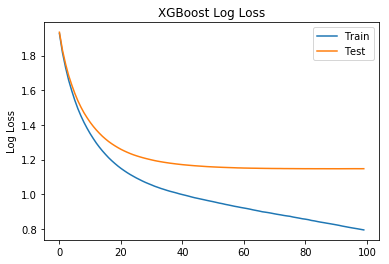

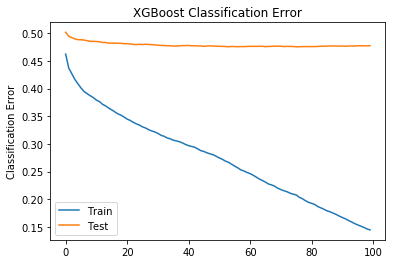

In [42]:
%matplotlib inline

results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

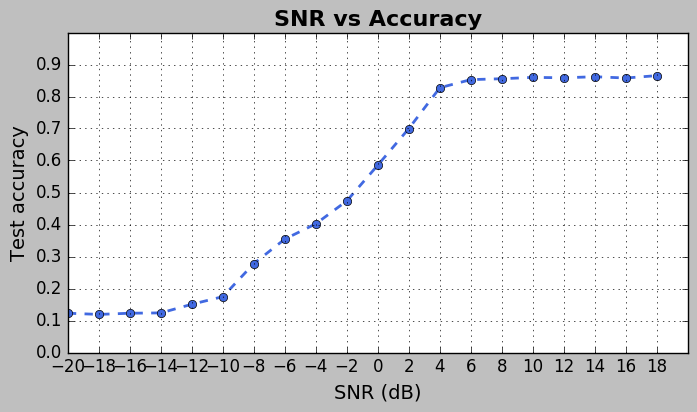

In [43]:
plt.style.use('classic')
acc_test = sorted(accuracy.items())
new_acc = []
for i in range(len(acc_test)):
    new_acc.append(acc_test[i][1])
acc_test_values = new_acc 

fig1 = plt.figure(figsize=(8,4), dpi=100)
x = snrs
y = list(acc_test_values)
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.89  0.00   0.00  0.00  0.00   0.05   0.05  0.01
BPSK   0.00  0.99   0.00  0.00  0.00   0.00   0.00  0.00
CPFSK  0.00  0.00   0.98  0.00  0.00   0.01   0.01  0.00
GFSK   0.01  0.00   0.00  0.98  0.00   0.00   0.01  0.00
PAM4   0.00  0.02   0.00  0.00  0.97   0.01   0.00  0.00
QAM16  0.01  0.00   0.00  0.00  0.00   0.56   0.43  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.42   0.57  0.00
QPSK   0.02  0.00   0.00  0.00  0.00   0.04   0.01  0.92


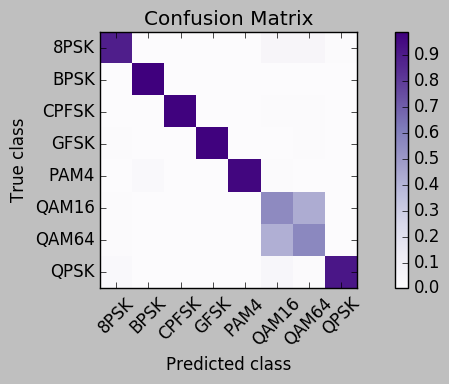

In [45]:
# Confusion Matrix
    
from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
conf_matrix = confusion_matrix(y_pred[18], y_32_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

## <font color = 'blue'> Use xbg library (rather than sklearn xgboost wrapper)

### Form dmatrices required by xbg

In [46]:
dtrain = xgb.DMatrix(X_32train_new, label=y_32_train)
dtest = defaultdict(list)

for snr in snrs:
    dtest[snr] = xgb.DMatrix(X_32test_new[snr], label=y_32_test[snr])

### n_boost_rounds = 100 = default # of estimators 
(num_boost_round = no. of trees to train)

In [47]:
xgbclassifier_model = model  #model whose hyperparameters we tuned
parameters = xgbclassifier_model.get_xgb_params()

#Use cross validation to set n_estimators 
eval_history = xgb.cv(parameters, dtrain, metrics = ['mlogloss', 'merror'], nfold = 5, early_stopping_rounds = 20,
                         num_boost_round = xgbclassifier_model.get_params()['n_estimators'])
xgbclassifier_model.set_params(n_estimators = eval_history.shape[0])

xgbclassifier_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, early_stopping_rounds=20, gamma=0.0,
       learning_rate=0.1, max_delta_step=0, max_depth=11,
       min_child_weight=6, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_class=8, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.75)

In [65]:
eval_set = [(X_32train_new, y_32_train), (X_test1, y_test1)]
start = time()
xgbclassifier_model.fit(X_32train_new, y_32_train, eval_metric = ['mlogloss','merror'], 
                        eval_set = eval_set) #fit model to data
print("Fitting model to data took {} minutes".format((time() - start)/60))

[0]	validation_0-mlogloss:1.94242	validation_0-merror:0.49605	validation_1-mlogloss:1.94496	validation_1-merror:0.5125
[1]	validation_0-mlogloss:1.84592	validation_0-merror:0.487038	validation_1-mlogloss:1.85107	validation_1-merror:0.50645
[2]	validation_0-mlogloss:1.76645	validation_0-merror:0.481887	validation_1-mlogloss:1.77405	validation_1-merror:0.505188
[3]	validation_0-mlogloss:1.70012	validation_0-merror:0.4801	validation_1-mlogloss:1.70999	validation_1-merror:0.504613
[4]	validation_0-mlogloss:1.64396	validation_0-merror:0.478	validation_1-mlogloss:1.65611	validation_1-merror:0.503012
[5]	validation_0-mlogloss:1.59659	validation_0-merror:0.4765	validation_1-mlogloss:1.61064	validation_1-merror:0.503287
[6]	validation_0-mlogloss:1.55416	validation_0-merror:0.476088	validation_1-mlogloss:1.57024	validation_1-merror:0.502612
[7]	validation_0-mlogloss:1.5172	validation_0-merror:0.474625	validation_1-mlogloss:1.53524	validation_1-merror:0.50195
[8]	validation_0-mlogloss:1.48358	val

[68]	validation_0-mlogloss:1.09912	validation_0-merror:0.410363	validation_1-mlogloss:1.1907	validation_1-merror:0.488687
[69]	validation_0-mlogloss:1.09788	validation_0-merror:0.409362	validation_1-mlogloss:1.19039	validation_1-merror:0.488663
[70]	validation_0-mlogloss:1.09665	validation_0-merror:0.409038	validation_1-mlogloss:1.18992	validation_1-merror:0.488613
[71]	validation_0-mlogloss:1.09513	validation_0-merror:0.408237	validation_1-mlogloss:1.18957	validation_1-merror:0.488963
[72]	validation_0-mlogloss:1.09371	validation_0-merror:0.407063	validation_1-mlogloss:1.18925	validation_1-merror:0.4891
[73]	validation_0-mlogloss:1.09244	validation_0-merror:0.406	validation_1-mlogloss:1.18897	validation_1-merror:0.489062
[74]	validation_0-mlogloss:1.09063	validation_0-merror:0.403488	validation_1-mlogloss:1.18876	validation_1-merror:0.489013
[75]	validation_0-mlogloss:1.0894	validation_0-merror:0.402487	validation_1-mlogloss:1.18851	validation_1-merror:0.488525
[76]	validation_0-mlogl

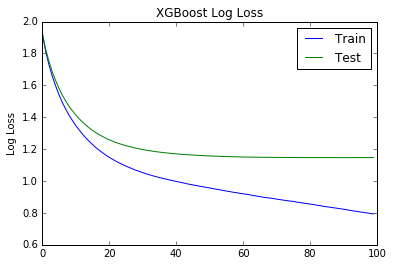

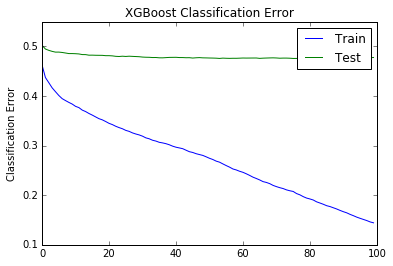

In [49]:
%matplotlib inline

results_xgbclassifier = xgbclassifier_model.evals_result()
epochs = len(results_xgbclassifier['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results_xgbclassifier['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier['validation_0']['merror'], label='Train')
ax.plot(x_axis, results_xgbclassifier['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score

predictions = defaultdict(list)
accuracy = defaultdict(list)
y_pred = defaultdict(list)

for snr in snrs:
    y_pred[snr] = xgbclassifier_model.predict(X_32test_new[snr])
    predictions[snr] = [round(value) for value in y_pred[snr]]
    accuracy[snr] = accuracy_score(y_32_test[snr], predictions[snr])
    print ("Test accuracy at ",snr,"dB =", accuracy[snr])

Test accuracy at  -20 dB = 0.12275
Test accuracy at  -18 dB = 0.119
Test accuracy at  -16 dB = 0.12275
Test accuracy at  -14 dB = 0.12375
Test accuracy at  -12 dB = 0.15075
Test accuracy at  -10 dB = 0.1745
Test accuracy at  -8 dB = 0.278
Test accuracy at  -6 dB = 0.3545
Test accuracy at  -4 dB = 0.40225
Test accuracy at  -2 dB = 0.474
Test accuracy at  0 dB = 0.58575
Test accuracy at  2 dB = 0.7
Test accuracy at  4 dB = 0.8275
Test accuracy at  6 dB = 0.85275
Test accuracy at  8 dB = 0.8555
Test accuracy at  10 dB = 0.85975
Test accuracy at  12 dB = 0.8585
Test accuracy at  14 dB = 0.86175
Test accuracy at  16 dB = 0.85775
Test accuracy at  18 dB = 0.86525


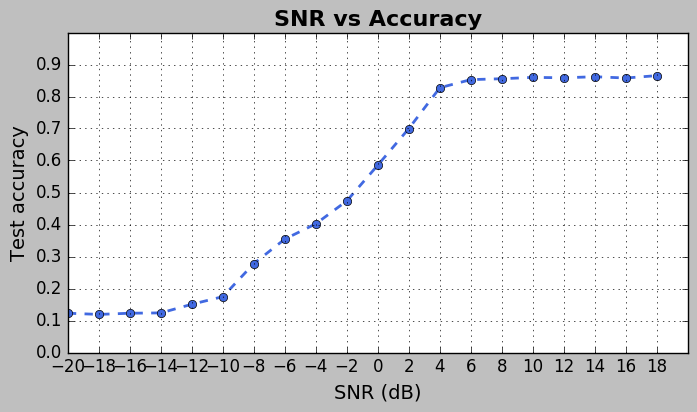

In [52]:
plt.style.use('classic')
acc_test = sorted(accuracy.items())
new_acc = []
for i in range(len(acc_test)):
    new_acc.append(acc_test[i][1])
acc_test_values = new_acc 

fig1 = plt.figure(figsize=(8,4), dpi=100)
x = snrs
y = list(acc_test_values)
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.89  0.00   0.00  0.00  0.00   0.05   0.05  0.01
BPSK   0.00  0.99   0.00  0.00  0.00   0.00   0.00  0.00
CPFSK  0.00  0.00   0.98  0.00  0.00   0.01   0.01  0.00
GFSK   0.01  0.00   0.00  0.98  0.00   0.00   0.01  0.00
PAM4   0.00  0.02   0.00  0.00  0.97   0.01   0.00  0.00
QAM16  0.01  0.00   0.00  0.00  0.00   0.56   0.43  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.42   0.57  0.00
QPSK   0.02  0.00   0.00  0.00  0.00   0.04   0.01  0.92


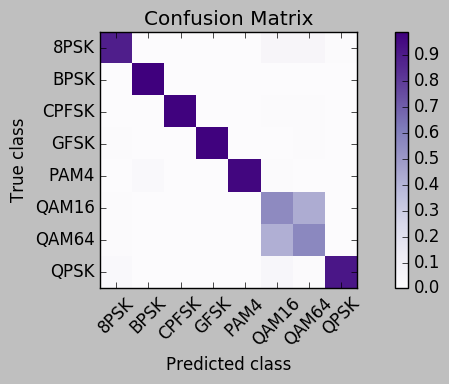

In [54]:
# Confusion Matrix
    
from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
conf_matrix = confusion_matrix(y_pred[18], y_32_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

### num_boost_round = 300; n_estimators = 300

In [55]:
xgbclassifier_model2 = model  #model whose hyperparameters we tuned
parameters = xgbclassifier_model2.get_xgb_params()

#Use cross validation to set n_estimators
start = time()
eval_history = xgb.cv(parameters, dtrain, metrics = ['mlogloss', 'merror'], nfold = 5, early_stopping_rounds = 20,
                         num_boost_round = 300)
xgbclassifier_model2.set_params(n_estimators = 300)

eval_set = [(X_32train_new, y_32_train), (X_test1, y_test1)]

xgbclassifier_model2.fit(X_32train_new, y_32_train, eval_metric = ['mlogloss','merror'], 
                        eval_set = eval_set) #fit model to data
print("Cross validation and fitting took {} minutes".format((time() - start)/60))

[0]	validation_0-mlogloss:1.92755	validation_0-merror:0.462388	validation_1-mlogloss:1.93455	validation_1-merror:0.502
[1]	validation_0-mlogloss:1.81628	validation_0-merror:0.437212	validation_1-mlogloss:1.83036	validation_1-merror:0.49475
[2]	validation_0-mlogloss:1.73125	validation_0-merror:0.42695	validation_1-mlogloss:1.75192	validation_1-merror:0.492038
[3]	validation_0-mlogloss:1.65796	validation_0-merror:0.416537	validation_1-mlogloss:1.68513	validation_1-merror:0.49
[4]	validation_0-mlogloss:1.59742	validation_0-merror:0.4087	validation_1-mlogloss:1.6311	validation_1-merror:0.488463
[5]	validation_0-mlogloss:1.54234	validation_0-merror:0.401038	validation_1-mlogloss:1.58221	validation_1-merror:0.488512
[6]	validation_0-mlogloss:1.49356	validation_0-merror:0.394675	validation_1-mlogloss:1.53902	validation_1-merror:0.487775
[7]	validation_0-mlogloss:1.45166	validation_0-merror:0.390763	validation_1-mlogloss:1.5023	validation_1-merror:0.486688
[8]	validation_0-mlogloss:1.41387	val

[67]	validation_0-mlogloss:0.896033	validation_0-merror:0.225725	validation_1-mlogloss:1.14871	validation_1-merror:0.476537
[68]	validation_0-mlogloss:0.893301	validation_0-merror:0.223275	validation_1-mlogloss:1.14855	validation_1-merror:0.476763
[69]	validation_0-mlogloss:0.890074	validation_0-merror:0.219763	validation_1-mlogloss:1.14826	validation_1-merror:0.476938
[70]	validation_0-mlogloss:0.886514	validation_0-merror:0.217287	validation_1-mlogloss:1.14816	validation_1-merror:0.476662
[71]	validation_0-mlogloss:0.88333	validation_0-merror:0.215163	validation_1-mlogloss:1.148	validation_1-merror:0.476175
[72]	validation_0-mlogloss:0.880487	validation_0-merror:0.213388	validation_1-mlogloss:1.14796	validation_1-merror:0.476413
[73]	validation_0-mlogloss:0.877143	validation_0-merror:0.21075	validation_1-mlogloss:1.14763	validation_1-merror:0.476413
[74]	validation_0-mlogloss:0.874471	validation_0-merror:0.20895	validation_1-mlogloss:1.14762	validation_1-merror:0.476162
[75]	validati

[134]	validation_0-mlogloss:0.686684	validation_0-merror:0.077013	validation_1-mlogloss:1.14992	validation_1-merror:0.47725
[135]	validation_0-mlogloss:0.684303	validation_0-merror:0.075912	validation_1-mlogloss:1.15002	validation_1-merror:0.477
[136]	validation_0-mlogloss:0.681617	validation_0-merror:0.07445	validation_1-mlogloss:1.1501	validation_1-merror:0.47695
[137]	validation_0-mlogloss:0.678812	validation_0-merror:0.07275	validation_1-mlogloss:1.15025	validation_1-merror:0.477375
[138]	validation_0-mlogloss:0.675853	validation_0-merror:0.0716	validation_1-mlogloss:1.15029	validation_1-merror:0.476988
[139]	validation_0-mlogloss:0.673665	validation_0-merror:0.070513	validation_1-mlogloss:1.15036	validation_1-merror:0.476975
[140]	validation_0-mlogloss:0.671009	validation_0-merror:0.069113	validation_1-mlogloss:1.15046	validation_1-merror:0.476813
[141]	validation_0-mlogloss:0.66824	validation_0-merror:0.067725	validation_1-mlogloss:1.1506	validation_1-merror:0.476438
[142]	valida

[201]	validation_0-mlogloss:0.525637	validation_0-merror:0.02125	validation_1-mlogloss:1.15836	validation_1-merror:0.476912
[202]	validation_0-mlogloss:0.523316	validation_0-merror:0.020662	validation_1-mlogloss:1.15854	validation_1-merror:0.477363
[203]	validation_0-mlogloss:0.521219	validation_0-merror:0.02035	validation_1-mlogloss:1.15861	validation_1-merror:0.4773
[204]	validation_0-mlogloss:0.518886	validation_0-merror:0.019987	validation_1-mlogloss:1.15874	validation_1-merror:0.4773
[205]	validation_0-mlogloss:0.516553	validation_0-merror:0.01965	validation_1-mlogloss:1.15888	validation_1-merror:0.477513
[206]	validation_0-mlogloss:0.513631	validation_0-merror:0.019063	validation_1-mlogloss:1.15899	validation_1-merror:0.4775
[207]	validation_0-mlogloss:0.51129	validation_0-merror:0.01855	validation_1-mlogloss:1.15914	validation_1-merror:0.477475
[208]	validation_0-mlogloss:0.509331	validation_0-merror:0.018175	validation_1-mlogloss:1.15928	validation_1-merror:0.477713
[209]	valid

[268]	validation_0-mlogloss:0.400978	validation_0-merror:0.005075	validation_1-mlogloss:1.16766	validation_1-merror:0.47745
[269]	validation_0-mlogloss:0.399218	validation_0-merror:0.004837	validation_1-mlogloss:1.16787	validation_1-merror:0.477637
[270]	validation_0-mlogloss:0.397634	validation_0-merror:0.004812	validation_1-mlogloss:1.16805	validation_1-merror:0.477663
[271]	validation_0-mlogloss:0.396339	validation_0-merror:0.004738	validation_1-mlogloss:1.1682	validation_1-merror:0.47765
[272]	validation_0-mlogloss:0.395038	validation_0-merror:0.004625	validation_1-mlogloss:1.16829	validation_1-merror:0.4774
[273]	validation_0-mlogloss:0.393404	validation_0-merror:0.004525	validation_1-mlogloss:1.1684	validation_1-merror:0.477062
[274]	validation_0-mlogloss:0.391655	validation_0-merror:0.004488	validation_1-mlogloss:1.16862	validation_1-merror:0.477163
[275]	validation_0-mlogloss:0.390339	validation_0-merror:0.004537	validation_1-mlogloss:1.16878	validation_1-merror:0.477313
[276]	

In [56]:
eval_history

,test-merror-mean,test-merror-std,test-mlogloss-mean,test-mlogloss-std,train-merror-mean,train-merror-std,train-mlogloss-mean,train-mlogloss-std
0,0.507662,0.002119,1.936791,0.001479,0.458653,0.002688,1.928032,0.000488
1,0.501650,0.004139,1.835599,0.003448,0.435650,0.002800,1.818443,0.002313
2,0.497200,0.003735,1.755325,0.004737,0.420594,0.001374,1.730046,0.001781
3,0.493800,0.003169,1.688766,0.005256,0.410869,0.001569,1.655890,0.001782
4,0.493750,0.004102,1.633064,0.005431,0.401909,0.000908,1.593027,0.001410
5,0.492362,0.004106,1.585748,0.005915,0.395597,0.001165,1.538604,0.001142
6,0.491350,0.003311,1.544547,0.006476,0.389137,0.001178,1.490676,0.001523
7,0.491250,0.002652,1.507688,0.006917,0.382791,0.000915,1.447380,0.001344
8,0.489800,0.002200,1.474918,0.006984,0.377150,0.001569,1.408386,0.001138
9,0.488650,0.003296,1.445872,0.007172,0.372106,0.001042,1.373230,0.000783


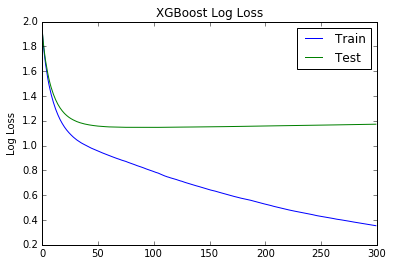

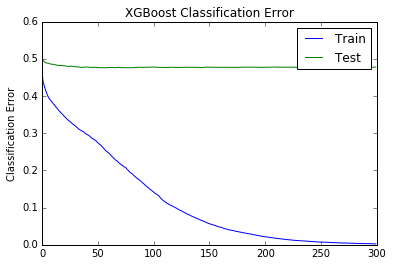

In [57]:
%matplotlib inline

results_xgbclassifier2 = xgbclassifier_model2.evals_result()
epochs = len(results_xgbclassifier2['validation_0']['merror'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier2['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results_xgbclassifier2['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results_xgbclassifier2['validation_0']['merror'], label='Train')
ax.plot(x_axis, results_xgbclassifier2['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

predictions = defaultdict(list)
accuracy = defaultdict(list)
y_pred = defaultdict(list)

for snr in snrs:
    y_pred[snr] = xgbclassifier_model2.predict(X_32test_new[snr])
    predictions[snr] = [round(value) for value in y_pred[snr]]
    accuracy[snr] = accuracy_score(y_32_test[snr], predictions[snr])
    print ("Test accuracy at ",snr,"dB =", accuracy[snr])

Test accuracy at  -20 dB = 0.12575
Test accuracy at  -18 dB = 0.1275
Test accuracy at  -16 dB = 0.11875
Test accuracy at  -14 dB = 0.1265
Test accuracy at  -12 dB = 0.145
Test accuracy at  -10 dB = 0.173
Test accuracy at  -8 dB = 0.256
Test accuracy at  -6 dB = 0.34775
Test accuracy at  -4 dB = 0.3995
Test accuracy at  -2 dB = 0.4805
Test accuracy at  0 dB = 0.598
Test accuracy at  2 dB = 0.70475
Test accuracy at  4 dB = 0.8245
Test accuracy at  6 dB = 0.856
Test accuracy at  8 dB = 0.8555
Test accuracy at  10 dB = 0.86
Test accuracy at  12 dB = 0.86025
Test accuracy at  14 dB = 0.8615
Test accuracy at  16 dB = 0.85975
Test accuracy at  18 dB = 0.86575


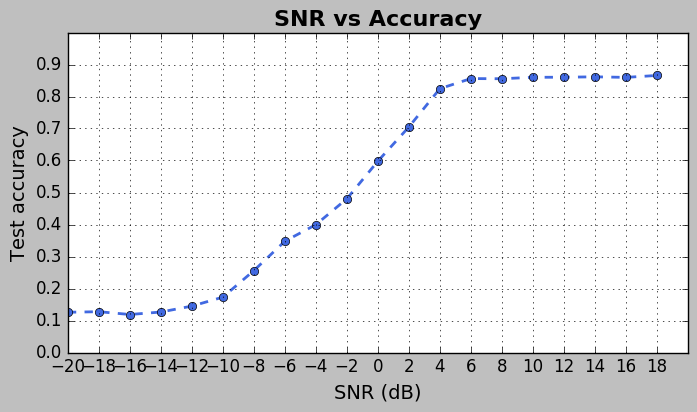

In [59]:
plt.style.use('classic')
acc_test = sorted(accuracy.items())
new_acc = []
for i in range(len(acc_test)):
    new_acc.append(acc_test[i][1])
acc_test_values = new_acc 

fig1 = plt.figure(figsize=(8,4), dpi=100)
x = snrs
y = list(acc_test_values)
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()

Confusion Matrix
       8PSK  BPSK  CPFSK  GFSK  PAM4  QAM16  QAM64  QPSK
8PSK   0.88  0.00   0.00  0.00  0.01   0.05   0.05  0.01
BPSK   0.00  0.99   0.00  0.00  0.00   0.00   0.00  0.01
CPFSK  0.00  0.00   0.99  0.00  0.00   0.01   0.01  0.00
GFSK   0.01  0.00   0.00  0.99  0.00   0.00   0.00  0.00
PAM4   0.00  0.01   0.00  0.00  0.97   0.01   0.00  0.00
QAM16  0.01  0.00   0.00  0.00  0.00   0.56   0.43  0.00
QAM64  0.01  0.00   0.00  0.00  0.00   0.42   0.56  0.01
QPSK   0.02  0.00   0.00  0.00  0.00   0.04   0.01  0.93


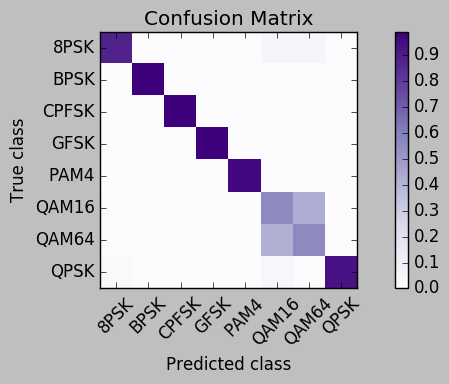

In [60]:
# Confusion Matrix
    
from sklearn.metrics import confusion_matrix

classes = ['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']
conf_matrix = confusion_matrix(y_pred[18], y_32_test[18])  

conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = conf_matrix.round(decimals = 2)

import pandas as pd

df = pd.DataFrame(data = conf_matrix, columns = classes, index = classes) 
print("Confusion Matrix")
print(df)

fig1 = plt.figure(figsize=(8,4), dpi=100)
plt.imshow(conf_matrix, interpolation = 'nearest', cmap = plt.cm.Purples)
ticks = np.arange(len(classes))
plt.title("Confusion Matrix")
plt.xticks(ticks, classes, rotation=45)
plt.yticks(ticks, classes)

plt.ylabel('True class')
plt.xlabel('Predicted class')

plt.tight_layout()
plt.colorbar()
plt.show()

### Tune trade-off between learning_rate and num_boost_round
Low learning_rate implies more trees must be added to the ensemble; learning_rate is commonly set between 0.1 and 0.3
and also less than 0.1. Our learning_rate of 0.1 found via grid search is high and suggests that the default no. of trees 100 (during grid search) is low and more trees should be added. 

In [61]:
param_grid10 = {'learning_rate': [0.0001, 0.001, 0.01, 0.1], 'n_estimators': [100, 200, 300, 400, 500]}

start = time()


grid_search10 = GridSearchCV(estimator = XGBClassifier(max_depth= 11, min_child_weight= 6, gamma = 0.0, subsample = 0.75, 
                              colsample_bytree = 0.85, reg_alpha= 1e-05, reg_lambda= 1, 
                              objective='multi:softprob', num_class=8, early_stopping_rounds=20), 
                       param_grid = param_grid10, scoring= 'accuracy', n_jobs=4)

grid_search10.fit(X_32train_new, y_32_train)
print("Grid search took {} minutes".format((time()-start)/60))

grid_search10.grid_scores_, grid_search10.best_params_, grid_search10.best_score_

Grid search took 287.1152663588524 minutes


([mean: 0.50915, std: 0.00124, params: {'n_estimators': 100, 'learning_rate': 0.0001},
  mean: 0.51045, std: 0.00119, params: {'n_estimators': 200, 'learning_rate': 0.0001},
  mean: 0.51039, std: 0.00150, params: {'n_estimators': 300, 'learning_rate': 0.0001},
  mean: 0.51005, std: 0.00125, params: {'n_estimators': 400, 'learning_rate': 0.0001},
  mean: 0.51025, std: 0.00098, params: {'n_estimators': 500, 'learning_rate': 0.0001},
  mean: 0.51025, std: 0.00181, params: {'n_estimators': 100, 'learning_rate': 0.001},
  mean: 0.51144, std: 0.00158, params: {'n_estimators': 200, 'learning_rate': 0.001},
  mean: 0.51181, std: 0.00173, params: {'n_estimators': 300, 'learning_rate': 0.001},
  mean: 0.51179, std: 0.00153, params: {'n_estimators': 400, 'learning_rate': 0.001},
  mean: 0.51256, std: 0.00069, params: {'n_estimators': 500, 'learning_rate': 0.001},
  mean: 0.51371, std: 0.00065, params: {'n_estimators': 100, 'learning_rate': 0.01},
  mean: 0.51716, std: 0.00049, params: {'n_estimat